<a href="https://colab.research.google.com/github/goforswap/Leukemia-Classification/blob/main/Leukemia_Original.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step - 1: Importing Necessary Libraries**

In [ ]:
# Importing Necessary Libraries

import os                                                                         # For Importing the Datasets
import cv2                                                                        # For converting the image into array
import numpy as np                                                                # For Array Operations
import matplotlib.pyplot as plt                                                   # For plotting images and Graphs
import tensorflow as tf                                                           # For implementing Models
from sklearn.utils import shuffle                                                 # For shuffling the dataset
from sklearn.model_selection import train_test_split                              # To split dataset into training and testing set
from keras.utils.np_utils import to_categorical                                   # For categorizing labels to 1-D vector
from tensorflow.python.keras import layers                                        # To add layers to the CNN Model
from tensorflow.python.keras.models import Sequential                             # Using Sequential Model
from tensorflow.python.keras.layers import Conv2D, MaxPool2D, Dense, Flatten      # Using Conv2D, MaxPool2D, Dense, Flatten Layers in the Sequential Model
from tensorflow.keras.optimizers import Adam                                      # Using Adam Optimizer
from keras.utils.vis_utils import plot_model                                      # For Plotting the CNN Model
from sklearn.metrics import confusion_matrix, classification_report               # For Evaluating the Model

**Step - 2: Loading the Dataset**

In [ ]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing the Dataset for the Google Drive
data = []       # This List Consist of Images in the form of Array
label = []      # This List Consists of the Class of the Image
Files = ['Benign', 'Early', 'Pre', 'Pro']       # Classes of the Dataset
label_val = 0

for files in Files:
    # Joining the Drive Path in order to Extract the Images
    cpath = os.path.join("/content/drive/MyDrive/Original", files)
    for img in os.listdir(cpath):
        # Converting The Images in the File Directory to the Image Array
        image_array = cv2.imread(os.path.join(cpath, img), cv2.IMREAD_COLOR)
        # Appending the Image Array in the data list
        data.append(image_array)
        # Appending the Label Value in the label list
        label.append(label_val)
    label_val = label_val+1

**Step - 3: Data Pre-Processing**

In [ ]:
# Transforming the Data as well as Label list into the form of array
X = np.asarray(data)
y = np.asarray(label)

In [ ]:
# Shuffling both the Feature and Target set
X, y = shuffle(X, y)

**Step - 4: Splitting the Dataset**

In [ ]:
# Splitting the dataset into Training and Testing Set
# The dataset consists of 3256 images, 
# Here, Training Set consists of 80%
# and Testing Set consists of 20%. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Printing the Shapes of the Training and Testing Set
print('Shape of X_train is {}'.format(X_train.shape))
print('Shape of X_test is {}'.format(X_test.shape))
print('Shape of y_train is {}'.format(y_train.shape))
print('Shape of y_test is {}'.format(y_test.shape))

Shape of X_train is (2604, 224, 224, 3)
Shape of X_test is (652, 224, 224, 3)
Shape of y_train is (2604,)
Shape of y_test is (652,)


**Step - 5: Normalization and Transformation**

In [ ]:
# Normalizing the Training and Testing X 
# in order to reduce the illumination effect
# and since CNN converge faster on [0..1]
# Also the pixel value ranges from 0-255 
X_train=X_train/255
X_test=X_test/255

# Labeling the categorical data using
# one-hot encoding among 4 categories
# That is to One-hot Vectors
# Thus, 2 will now be [0,0,1,0]
y_train_cat=to_categorical(y_train,4)
y_test_cat=to_categorical(y_test,4)

**Step - 6: Visualizing the Data**

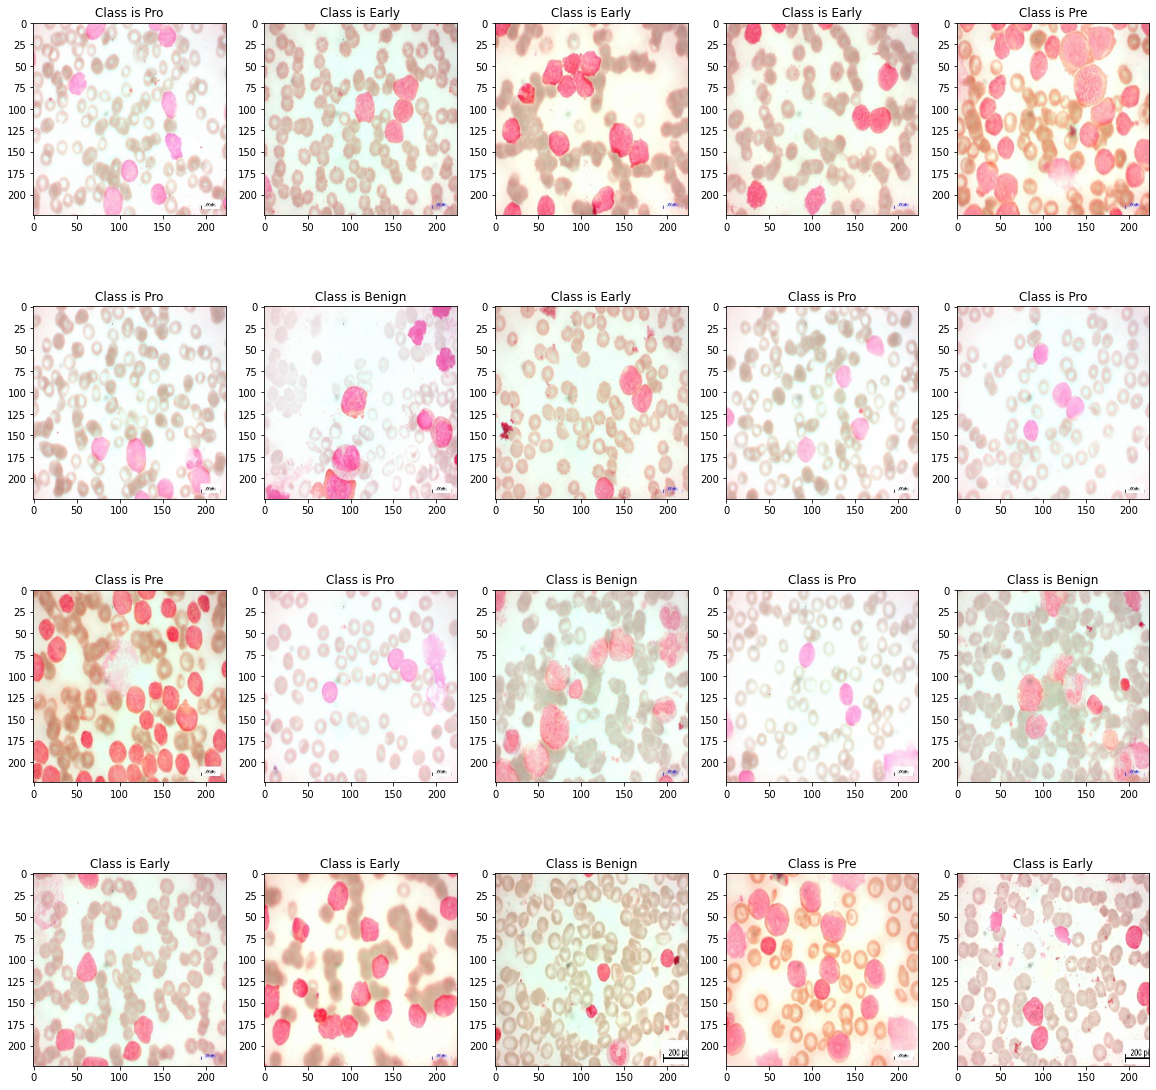

In [ ]:
# Visualizing the Data

# Reshaping in order to Plot it as Image
X_train__ = X_train.reshape(X_train.shape[0], 224, 224, 3)

# Plotting the Images such that only 4 row will be plotted
# and a row consists of 5 columns
fig, axis = plt.subplots(4, 5, figsize=(20, 20))
# Now we use axis so that plotting of all the axes is easy in one loop
for i, ax in enumerate(axis.flat):
    # Plotting the Image
    ax.imshow(X_train__[i], cmap='binary')
    # Getting the Respective Cancer class
    cancer = y_train_cat[i].argmax()
    classname = Files[cancer]
    # Setting the Title as the Cancer Class
    ax.set(title = "Class is {:}".format(classname))

**Step - 7: Building & Compiling the Model**

In [ ]:
# Building the CNN Model

# Sequential model is used, since implementation is easy 
# And you only need to add one layer at a time , starting from input
CNN_model = Sequential()

# Using Convolutional Layer with 64 filters where each filter from 64 will transform a part of image, 
# kernel size is (3,3), input shape with 224x224x3 and 'relu' activation function
CNN_model.add(Conv2D(64, (3, 3), activation="relu", input_shape=(224,224,3)))

# Using MaxPooling layer which acts as a Downsampling Filter 
# We used MaxPool2D since the data (image) is 2D
# Since we defined pool_size as 2,2 thus, it will look 2 neighboring pixels and 
# it will pick the maximal value
CNN_model.add(MaxPool2D(pool_size=(2, 2)))

# Using Convolutional Layer with 64 filters, kernel size is (3,3) and 'relu' activation function
CNN_model.add(Conv2D(64, (3, 3), activation='relu'))
# Using MaxPooling layer 2D since image is 2D, with 2,2 as neighboring pixels
CNN_model.add(MaxPool2D(pool_size=(2, 2)))

# Using Flatten Layer to convert the final feature map into a single 1-D vector 
CNN_model.add(Flatten())
# Using Dense Layer to classify the vectors into 16 classes
CNN_model.add(Dense(16))
# Classified the output to the final 4 classes on which we have to classify
# softmax function is used since we need a probabilistic distribution of each classes
CNN_model.add(Dense(4, activation='softmax'))

# Printing the CNN model summary
CNN_model.summary()

# Compiled the CNN model with 'Adam' optimizer with learning rate of 0.001
# loss function will be categorical cross-entropy
# Evaluation parameter will be accuracy
# Thus After each Epoch, loss & accuracy will be printed
CNN_model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 186624)            0         
                                                                 
 dense (Dense)               (None, 16)                2

**Step - 8: Building the Model**

In [ ]:
# Training the CNN Model
# Here x is X_train
# y is y_train_cat
# No. of epochs is 15
# At a time, a batch of 16 images will be processed
# Validation set is 'x_test' and 'y_test_cat'
CNN_history=CNN_model.fit(X_train,
                  y_train_cat,
                  epochs=15,
                  batch_size=16,
                  validation_data=(X_test,y_test_cat))

Epoch 1/15
163/163 [==============================] - 308s 2s/step - loss: 1.3583 - accuracy: 0.5415 - val_loss: 0.6576 - val_accuracy: 0.6825
Epoch 2/15
163/163 [==============================] - 305s 2s/step - loss: 0.5673 - accuracy: 0.7477 - val_loss: 0.6122 - val_accuracy: 0.6948
Epoch 3/15
163/163 [==============================] - 302s 2s/step - loss: 0.4622 - accuracy: 0.8095 - val_loss: 0.5268 - val_accuracy: 0.7623
Epoch 4/15
163/163 [==============================] - 303s 2s/step - loss: 0.3497 - accuracy: 0.8621 - val_loss: 0.5319 - val_accuracy: 0.7883
Epoch 5/15
163/163 [==============================] - 304s 2s/step - loss: 0.3013 - accuracy: 0.8790 - val_loss: 0.6538 - val_accuracy: 0.7607
Epoch 6/15
163/163 [==============================] - 304s 2s/step - loss: 0.2494 - accuracy: 0.9021 - val_loss: 0.5498 - val_accuracy: 0.7929
Epoch 7/15
163/163 [==============================] - 304s 2s/step - loss: 0.1738 - accuracy: 0.9409 - val_loss: 0.5339 - val_accuracy: 0.8113

**Step - 9: Plotting the Model**

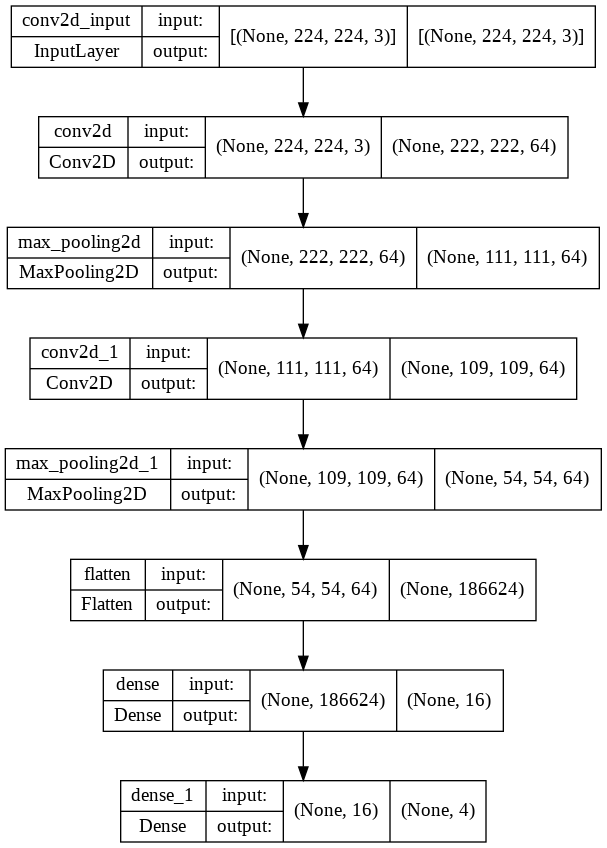

In [ ]:
# Plotting the CNN Model along with the Shapes and Each Layer Name
plot_model(CNN_model, show_shapes=True, show_layer_names=True)

**Step - 10: Visualizing the Performance of the Model**

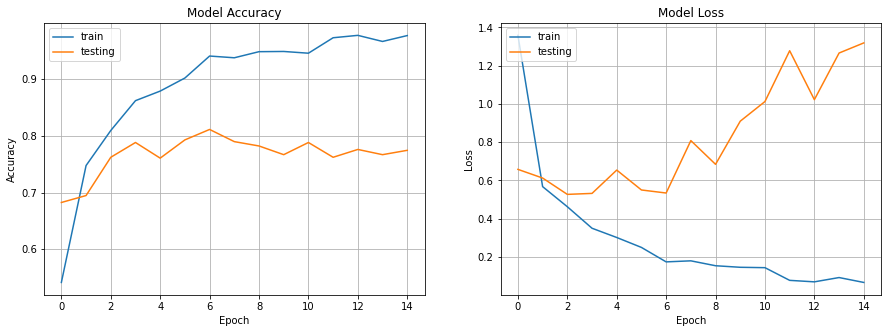

In [ ]:
# Visualizing the history of fitting of CNN model

def plotmodelhistory(history): 
    fig, axs = plt.subplots(1,2,figsize=(15,5)) 
    
    # Summarizing history for accuracy
    # Here, accuracy vs epochs is plotted
    axs[0].plot(CNN_history.history['accuracy']) 
    axs[0].plot(CNN_history.history['val_accuracy']) 
    axs[0].grid()
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'testing'], loc='upper left')
    
    # Summarizing history for loss
    # Here, loss vs epochs is plotted
    axs[1].plot(CNN_history.history['loss']) 
    axs[1].plot(CNN_history.history['val_loss']) 
    axs[1].grid()
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'testing'], loc='upper left')
    plt.show()

plotmodelhistory(CNN_history)

**Step - 11: Evaluating the Model**

In [ ]:
# Computing the Scores of the model by evaluating the Model
# and Printing the Loss & Accuracy on Test Set
scores = CNN_model.evaluate(X_test, y_test_cat, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

21/21 [==============================] - 18s 844ms/step - loss: 1.3188 - accuracy: 0.7745
Test loss: 1.3187839984893799
Test accuracy: 0.7745398879051208


In [ ]:
# Functions for plotting the Confusion Matrix

def heatmap(data, row_labels, col_labels, ax=None, cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.
    """
    if not ax:
        ax = plt.gca()

    # Plotting the heatmap
    im = ax.imshow(data, **kwargs)

    # Create the colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)
    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)
    
    ax.set_xlabel('CNN Predicted Label') 
    ax.set_ylabel('True Label')
    
    return im, cbar

def annotate_heatmap(im, data=None, fmt="d", threshold=None):
    """
    A function to annotate a heatmap.
    """
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            text = im.axes.text(j, i, format(data[i, j], fmt), horizontalalignment="center",
                                 color="white" if data[i, j] > threshold else "black")
            texts.append(text)

    return texts

In [ ]:
# Performing prediction on Testing Set from our CNN model
# Output will be in the form of encoded labels
pred = CNN_model.predict(X_test)

# Decoding the Predicted labels by Converting the predictions classes to one-hot vectors 
CNN_pred = np.argmax(pred,axis=1)
# Decoding the True labels by Converting the validation observations to one-hot vectors
CNN_true = np.argmax(y_test_cat, axis=1)

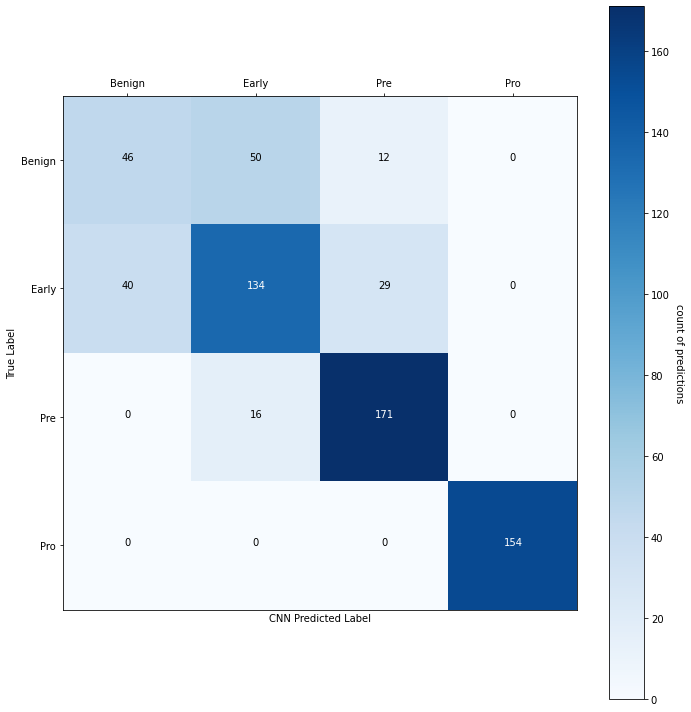

In [ ]:
# Creating the Confusion Matrix
cm = confusion_matrix(CNN_true, CNN_pred) 
thresh = cm.max() / 2.

# Plotting the Graph with figure size 10x10
fig, ax = plt.subplots(figsize=(10,10))
# Calling the 'heatmap' function to Plot the Confusion Matrix
im, cbar = heatmap(cm, Files, Files, ax=ax,
                   cmap=plt.cm.Blues, cbarlabel="count of predictions")
# Calling the 'annotate_heatmap' function to adding the numbers on each cell
texts = annotate_heatmap(im, data=cm, threshold=thresh)

fig.tight_layout()
plt.show()

In [ ]:
# Printing the Classification Report to evaluate the model
# using metrics such as Precision, Recall, F1-Score, etc.
print(classification_report(CNN_true, CNN_pred))

              precision    recall  f1-score   support

           0       0.53      0.43      0.47       108
           1       0.67      0.66      0.67       203
           2       0.81      0.91      0.86       187
           3       1.00      1.00      1.00       154

    accuracy                           0.77       652
   macro avg       0.75      0.75      0.75       652
weighted avg       0.76      0.77      0.77       652



**Step - 12: Prediction on the Test Set using the Trained Model**

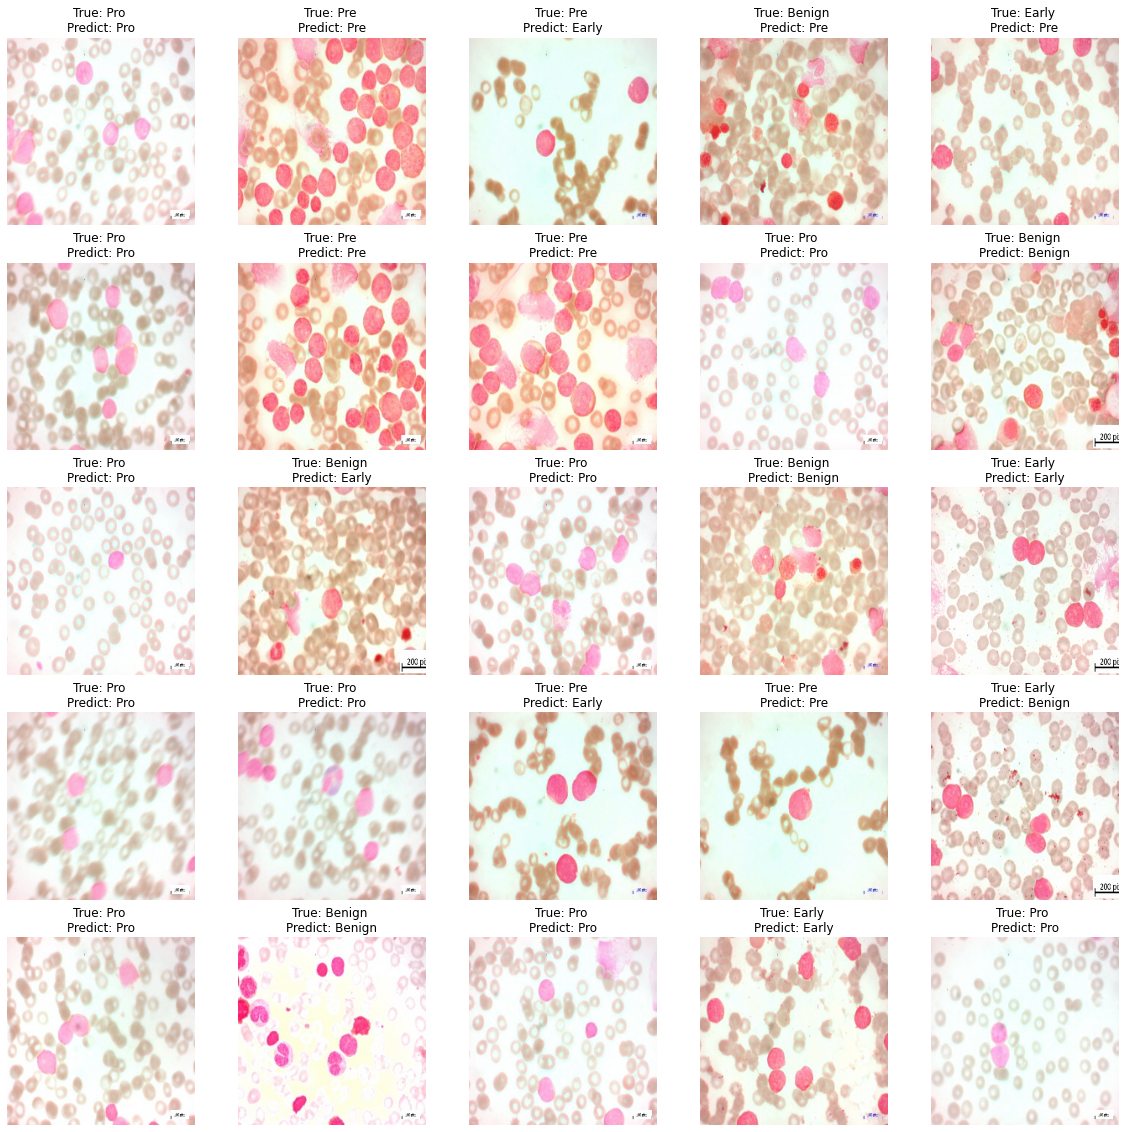

In [ ]:
# Checking the Predictions computed from the Model

# Plotting the Images such that only 5 row will be plotted
# and each row consists of 5 columns with each graph of 20x20
fig, axes = plt.subplots(5, 5, figsize=(20,20))
axes = axes.ravel()

for i in np.arange(0, 5*5):
    # Plotting the Image
    axes[i].imshow(X_test[i])
    # Computing the True Label & Predicted Label and Setting it as Title
    axes[i].set_title("True: %s \nPredict: %s" % (Files[CNN_true[i]], Files[CNN_pred[i]]))
    # Not Plotting the axis
    axes[i].axis('off')

**Working with Traditional ML Models**

In [ ]:
# Importing Traditional ML Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import seaborn as sns

In [ ]:
# Reshaping Training and Testing Set
# For Traditional ML Algorithms
nsamples, nx, ny, nrgb = X_train.shape
X_train_ML = X_train.reshape((nsamples, nx*ny*nrgb))

nsamples, nx, ny, nrgb = X_test.shape
X_test_ML = X_test.reshape((nsamples, nx*ny*nrgb))

In [ ]:
# Function for Training, Predicting & Evaluation ML Model
def model_eval(model, X_train_ML, y_train, X_test_ML, y_test):
  model.fit(X_train_ML,y_train)  
  y_pred = model.predict(X_test_ML)
  print("\nAccuracy Score: {:.4f} ~ {:.2f}%".format(accuracy_score(y_test, y_pred), accuracy_score(y_test, y_pred)*100))
  print("\nClassification Report:")
  print(classification_report(y_test, y_pred))
  # Creating Confusion Matrix
  print("\nConfusion Matrix:")
  cm = confusion_matrix(y_test, y_pred) 
  thresh = cm.max() / 2.

  fig, ax = plt.subplots(figsize=(10,10))
  im, cbar = heatmap(cm, Files, Files, ax=ax,
                    cmap=plt.cm.Blues, cbarlabel="count of predictions")
  texts = annotate_heatmap(im, data=cm, threshold=thresh)

  fig.tight_layout()
  plt.show()

Using "Logistic Regression" as Machine Learning Classification Algorithm:- 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,



Accuracy Score: 0.7362 ~ 73.62%

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.27      0.37       100
           1       0.67      0.72      0.69       199
           2       0.76      0.78      0.77       183
           3       0.82      0.99      0.89       170

    accuracy                           0.74       652
   macro avg       0.71      0.69      0.68       652
weighted avg       0.72      0.74      0.72       652


Confusion Matrix:


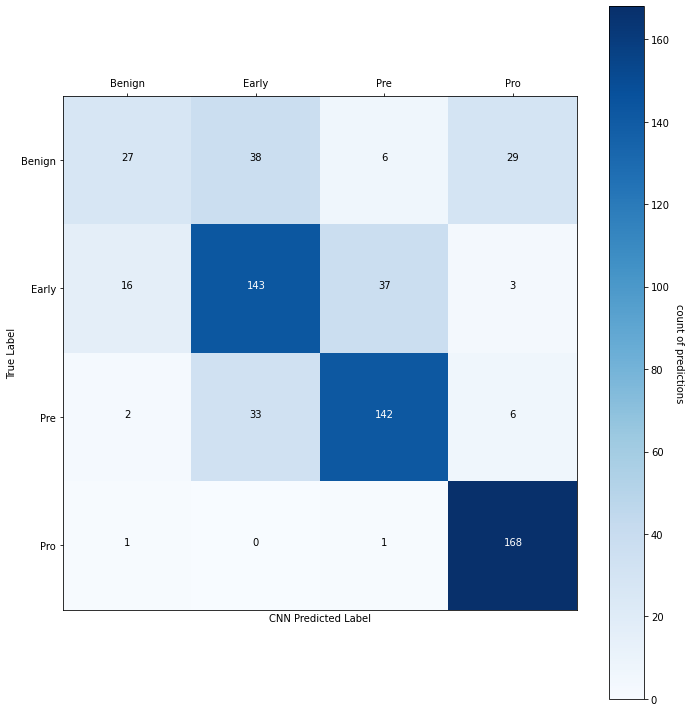

In [ ]:
# Implementing Logistic Regression
model = LogisticRegression(max_iter=2000)
print("Using \"Logistic Regression\" as Machine Learning Classification Algorithm:- ")
model_eval(model, X_train_ML, y_train, X_test_ML, y_test)

Using "Decision Tree" as Machine Learning Classification Algorithm:- 

Accuracy Score: 0.8098 ~ 80.98%

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.63      0.60       102
           1       0.83      0.82      0.82       195
           2       0.87      0.81      0.84       210
           3       0.88      0.92      0.90       145

    accuracy                           0.81       652
   macro avg       0.79      0.80      0.79       652
weighted avg       0.81      0.81      0.81       652


Confusion Matrix:


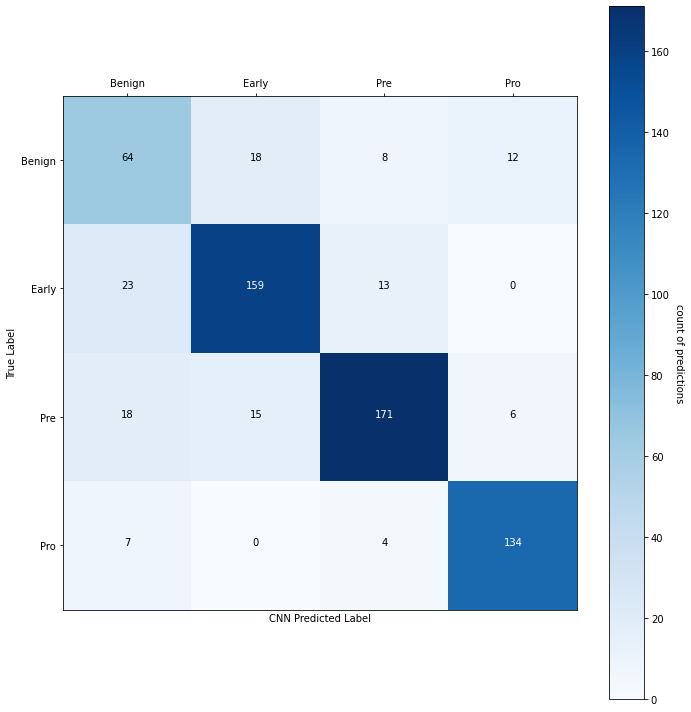

In [ ]:
# Implementing Decision Tree
model = DecisionTreeClassifier(max_depth=30)
print("Using \"Decision Tree\" as Machine Learning Classification Algorithm:- ")
model_eval(model, X_train_ML, y_train, X_test_ML, y_test)

Using "Random Forest" as Machine Learning Classification Algorithm:- 

Accuracy Score: 0.8620 ~ 86.20%

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.42      0.56       102
           1       0.80      0.98      0.88       195
           2       1.00      0.87      0.93       210
           3       0.81      0.99      0.89       145

    accuracy                           0.86       652
   macro avg       0.86      0.82      0.82       652
weighted avg       0.87      0.86      0.85       652


Confusion Matrix:


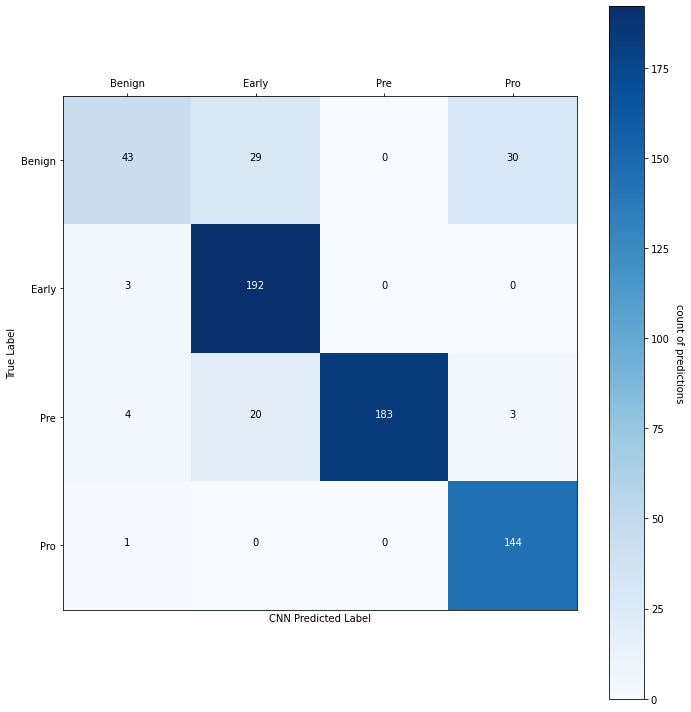

In [ ]:
# Implementing Random Forest
model=RandomForestClassifier(n_estimators=300)
print("Using \"Random Forest\" as Machine Learning Classification Algorithm:- ")
model_eval(model, X_train_ML, y_train, X_test_ML, y_test)

Using "K-Neighbors" as Machine Learning Classification Algorithm:- 

Accuracy Score: 0.4586 ~ 45.86%

Classification Report:
              precision    recall  f1-score   support

           0       0.22      0.60      0.32       102
           1       0.65      0.26      0.37       195
           2       0.96      0.20      0.34       210
           3       0.58      0.99      0.73       145

    accuracy                           0.46       652
   macro avg       0.60      0.51      0.44       652
weighted avg       0.67      0.46      0.43       652


Confusion Matrix:


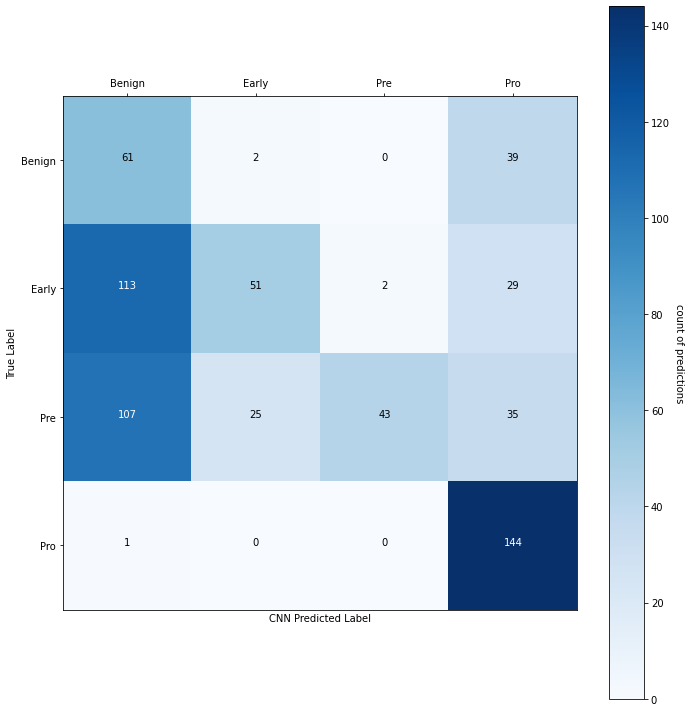

In [ ]:
# Implementing K-Neighbors
model = KNeighborsClassifier()
print("Using \"K-Neighbors\" as Machine Learning Classification Algorithm:- ")
model_eval(model, X_train_ML, y_train, X_test_ML, y_test)

Using "SVM" as Machine Learning Classification Algorithm:- 

Accuracy Score: 0.7853 ~ 78.53%

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.61      0.59       102
           1       0.74      0.77      0.75       195
           2       0.88      0.77      0.82       210
           3       0.88      0.95      0.92       145

    accuracy                           0.79       652
   macro avg       0.77      0.78      0.77       652
weighted avg       0.79      0.79      0.79       652


Confusion Matrix:


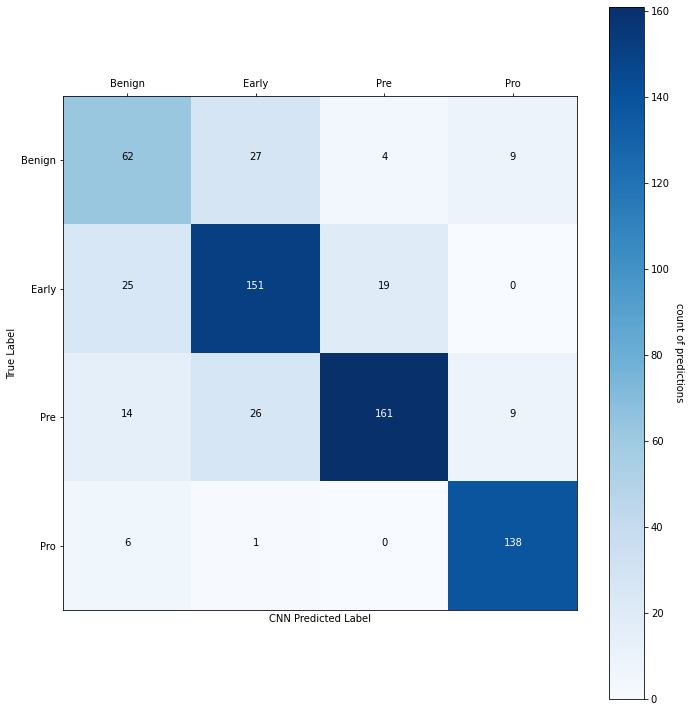

In [ ]:
# Implementing SVM
model = SVC(kernel='linear', C = 1.0)
print("Using \"SVM\" as Machine Learning Classification Algorithm:- ")
model_eval(model, X_train_ML, y_train, X_test_ML, y_test)

Using "Naive Bayes (Gaussian)" as Machine Learning Classification Algorithm:- 

Accuracy Score: 0.7914 ~ 79.14%

Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.49      0.44       100
           1       0.80      0.75      0.77       199
           2       0.97      0.85      0.91       183
           3       0.90      0.95      0.93       170

    accuracy                           0.79       652
   macro avg       0.77      0.76      0.76       652
weighted avg       0.81      0.79      0.80       652


Confusion Matrix:


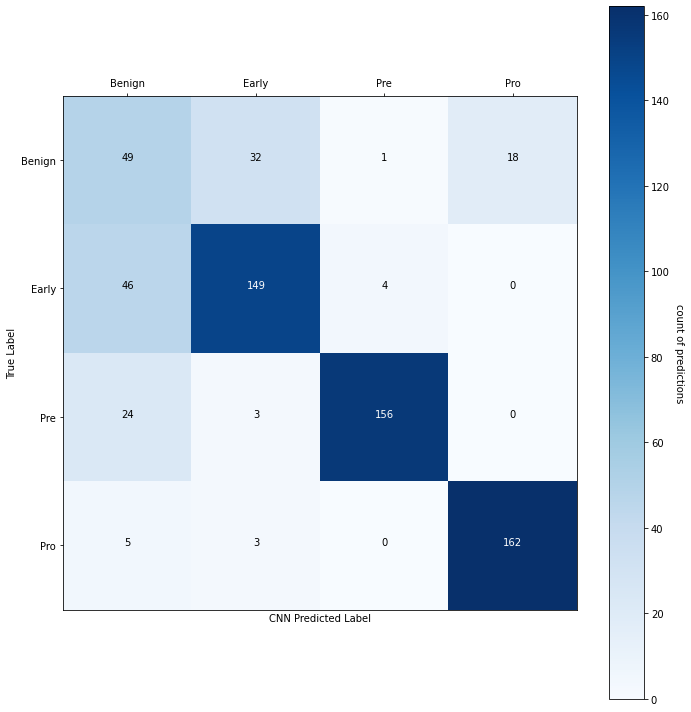

In [ ]:
# Implementing Naive Bayes (Gaussian)
model = GaussianNB()
print("Using \"Naive Bayes (Gaussian)\" as Machine Learning Classification Algorithm:- ")
model_eval(model, X_train_ML, y_train, X_test_ML, y_test)

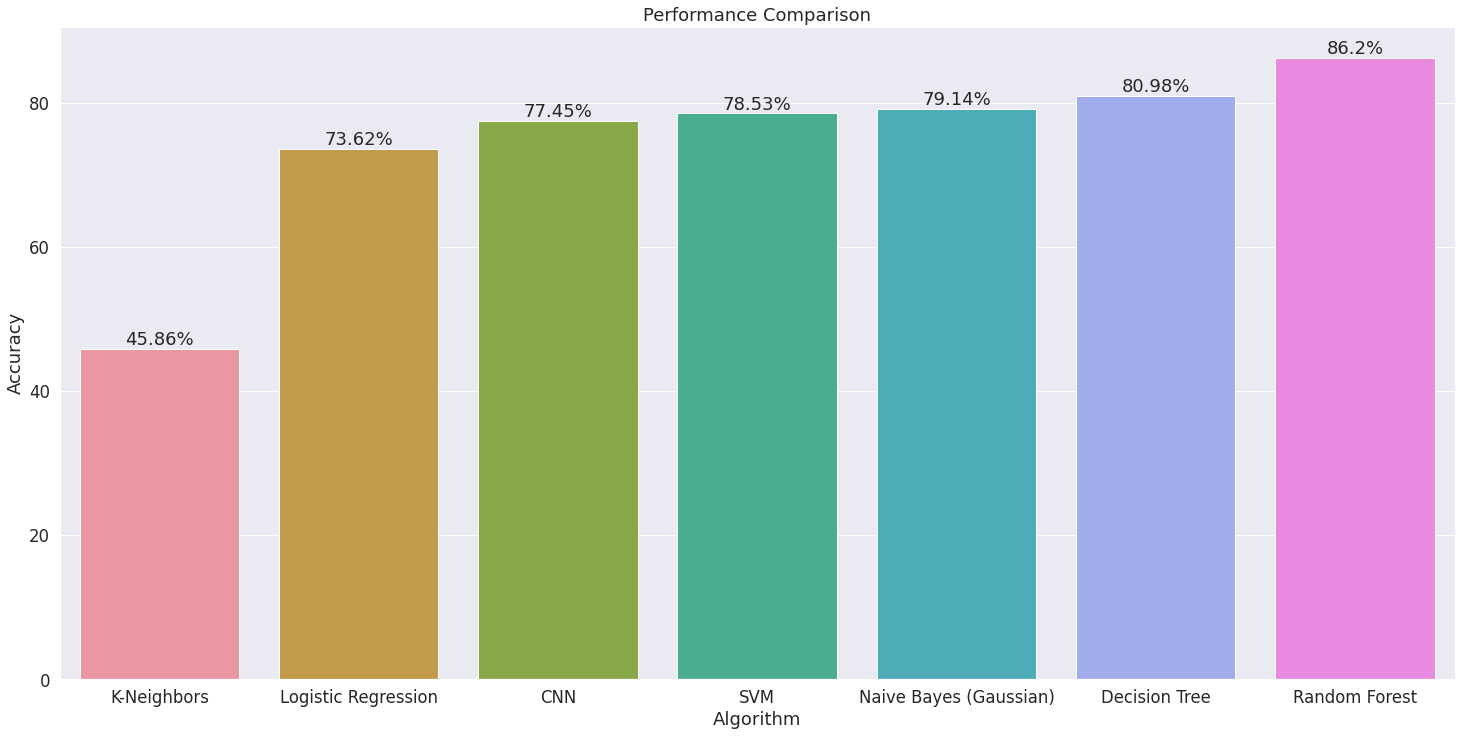

In [ ]:
# Plotting Accuracy of All Models
models = ['K-Neighbors', 'Logistic Regression', 'CNN', 'SVM', 'Naive Bayes (Gaussian)', 'Decision Tree', 'Random Forest']
accuracy = [45.86, 73.62, 77.45, 78.53, 79.14, 80.98, 86.20]

sns.set(font_scale = 1.5, palette="husl")
plt.figure(figsize=(25,12))
sns.barplot(x=models, y=accuracy)
for i in range(len(models)):
    value = str(accuracy[i]) + "%"
    plt.text(i, accuracy[i], value, ha="center", va="bottom")
plt.title('Performance Comparison')
plt.ylabel('Accuracy') 
plt.xlabel('Algorithm')

plt.show()